# TRAF7
The TRAF7 gene encodes a member of a family of proteins known as tumor necrosis factor (TNF; see 191160) receptor-associated factors, which are signal transducers for members of the TNF receptor superfamily. [cardiac, facial, and digital anomalies with developmental delay (CAFDADD)](https://omim.org/entry/618164) is caused by heterozygous mutation in the TRAF7 gene.

We searched for published genotype-phenotype correlations but did not identify any relevant publications (Nov. 8, 2024).

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


### TRAF7
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for TRAF7.

In [2]:
gene_symbol = 'TRAF7'
mane_tx_id = 'NM_032271.3'
mane_protein_id = 'NP_115647.2' # E3 ubiquitin-protein ligase TRAF7

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.23' 
registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 45/45 [00:41<00:00,  1.08 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
23,Patent ductus arteriosus
20,Short neck
20,Blepharophimosis
19,Epicanthus
19,Global developmental delay
17,Feeding difficulties
16,Hypertelorism
15,Pectus carinatum
15,Delayed speech and language development
14,Hypotonia


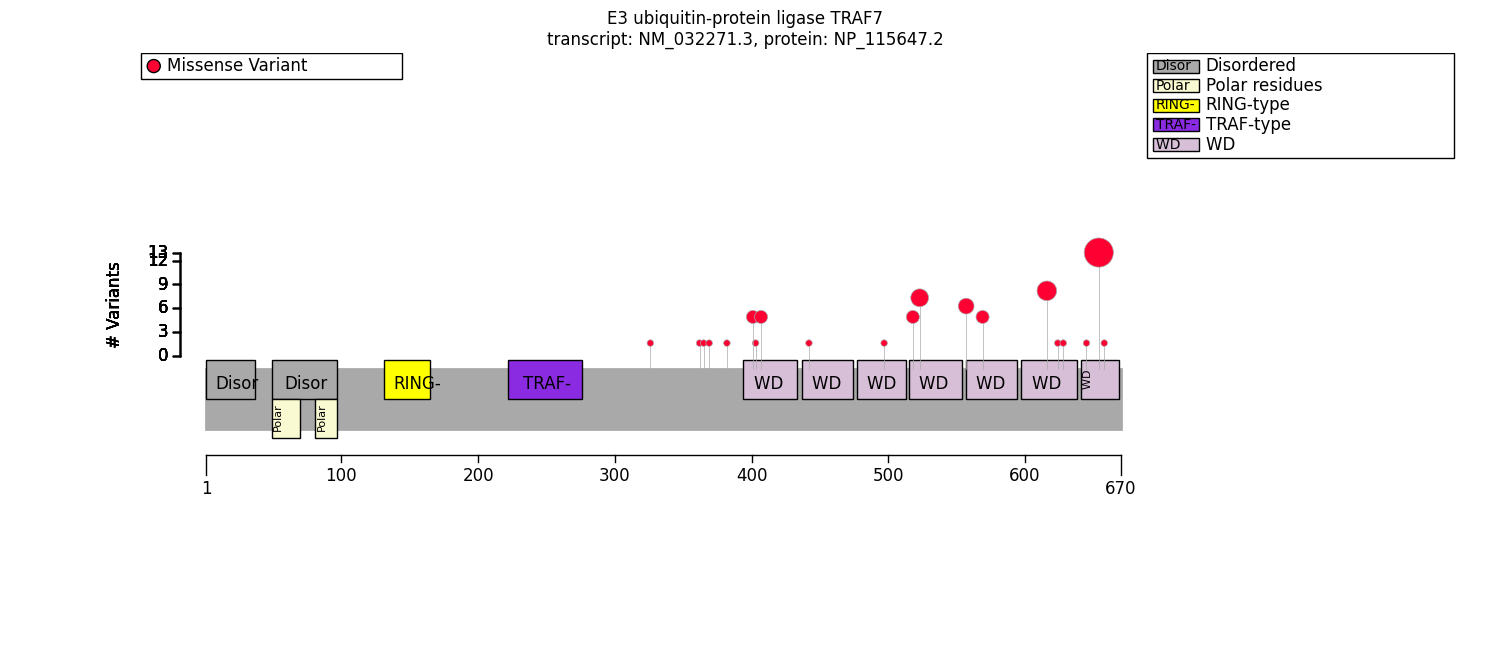

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

traf7_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
traf7_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,2 - 37,
0,Disordered,Region,50 - 97,
0,Polar residues,Compositional bias,50 - 70,
0,Polar residues,Compositional bias,82 - 97,
0,RING-type,Zinc finger,132 - 165,
0,TRAF-type,Zinc finger,223 - 276,
5,WD 1,Repeat,395 - 433,p.Leu402Val; p.Gly408Asp; p.Val404Asp
1,WD 2,Repeat,438 - 474,p.Leu443Arg
1,WD 3,Repeat,478 - 513,p.Lys498Asn
6,WD 4,Repeat,516 - 554,p.Arg524Trp; p.Leu519Phe


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model.genome import Region
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import protein_feature

wd7 = protein_feature(feature_id="WD 7", protein_metadata=protein_meta)
wd7_clf = monoallelic_classifier(
    a_predicate=wd7,
    b_predicate=~wd7,
    a_label="WD7",
    b_label="other"
)
wd7_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=wd7_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(wd7_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,15
HMF03,Skipping term because of a child term with the same individual counts,8
HMF08,Skipping general term,126
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,745


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=wd7_result)

Allele group                                          WD7          other  \
                                                    Count Percent  Count   
Feeding difficulties [HP:0011968]                    6/10     60%  15/25   
Abdominal symptom [HP:0011458]                        7/7    100%  15/15   
Motor delay [HP:0001270]                              5/5    100%  16/17   
Neurodevelopmental delay [HP:0012758]               12/12    100%  26/26   
Neurodevelopmental abnormality [HP:0012759]         14/14    100%  27/27   
Abnormal axial skeleton morphology [HP:0009121]     15/15    100%  23/23   
Patent ductus arteriosus [HP:0001643]                 9/9    100%  14/14   
Abnormal morphology of the great vessels [HP:00...  10/10    100%  15/15   
Abnormal blood vessel morphology [HP:0033353]       11/11    100%  17/17   
Hearing impairment [HP:0000365]                       8/8    100%  11/11   
Short neck [HP:0000470]                               8/8    100%  12/12   
Abnormality of the vertebral column [HP:0000925]    11/11    100%  16/16   
Abnormal location of ears [HP:0000357]                6/6    100%  13/13   
Abnormal pinna morphology [HP:0000377]                7/7    100%  16/16   
Abnormal eyelid morphology [HP:0000492]             13/13    100%  26/26   
Abnormal ocular adnexa morphology [HP:0030669]      13/13    100%  27/27   
Abnormality of the orbital region [HP:0000315]      13/13    100%  27/27   
Blepharophimosis [HP:0000581]                         6/6    100%  14/14   
Abnormal size of the palpebral fissures [HP:020...    6/6    100%  22/22   
Abnormality of the palpebral fissures [HP:0008050]    9/9    100%  25/25   
Delayed speech and language development [HP:000...    7/7    100%  13/13   
Language impairment [HP:0002463]                      7/7    100%  13/13   
Abnormal communication [HP:0034434]                   7/7    100%  13/13   
Abnormal speech pattern [HP:0002167]                  7/7    100%  13/13   
Epicanthus [HP:0000286]                               8/8    100%  11/11   
Abnormal oral cavity morphology [HP:0000163]        11/11    100%  20/20   
Abnormal digit morphology [HP:0011297]                9/9    100%  14/14   
Abnormal appendicular skeleton morphology [HP:0...  10/10    100%  17/17   
Abnormal thorax morphology [HP:0000765]               9/9    100%  11/11   
Abnormal external nose morphology [HP:0010938]        9/9    100%  11/11   
Abnormal nasal morphology [HP:0005105]              10/10    100%  18/18   
Abnormality of the nose [HP:0000366]                10/10    100%  18/18   
Global developmental delay [HP:0001263]               8/8    100%  11/11   
Abnormal brain morphology [HP:0012443]                6/6    100%  15/15   
Morphological central nervous system abnormalit...    7/7    100%  15/15   

Allele group                                                                   \
                                                   Percent Corrected p values   
Feeding difficulties [HP:0011968]                      60%                1.0   
Abdominal symptom [HP:0011458]                        100%                1.0   
Motor delay [HP:0001270]                               94%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Patent ductus arteriosus [HP:0001643]                 100%                1.0   
Abnormal morphology of the great vessels [HP:00...    100%                1.0   
Abnormal blood vessel morphology [HP:0033353]         100%                1.0   
Hearing impairment [HP:0000365]                       100%                1.0   
Short neck [HP:0000470]                               100%                1.0   
Abnormality of the vertebral column [HP:0000925]      100%                1.0   
Abnormal location of ears [HP:0000357]               

In [10]:
from gpsea.analysis.predicate import variant_key

r655q = variant_key("16_2176350_2176350_G_A") #c.1964G>A	p.Arg655Gln
r655q_clf = monoallelic_classifier(
    a_predicate=r655q,
    b_predicate= ~r655q,
    a_label='Arg655Gln', 
    b_label='Other variant',
)
r655q_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r655q_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, r655q_result)

Allele group                                       Arg655Gln          \
                                                       Count Percent   
Feeding difficulties [HP:0011968]                        4/8     50%   
Abdominal symptom [HP:0011458]                           5/5    100%   
Motor delay [HP:0001270]                                 5/5    100%   
Neurodevelopmental delay [HP:0012758]                  11/11    100%   
Neurodevelopmental abnormality [HP:0012759]            12/12    100%   
Abnormal axial skeleton morphology [HP:0009121]        13/13    100%   
Patent ductus arteriosus [HP:0001643]                    9/9    100%   
Abnormal morphology of the great vessels [HP:00...       9/9    100%   
Abnormal blood vessel morphology [HP:0033353]          10/10    100%   
Hearing impairment [HP:0000365]                          7/7    100%   
Short neck [HP:0000470]                                  6/6    100%   
Abnormality of the vertebral column [HP:0000925]         9/9    100%   
Abnormal location of ears [HP:0000357]                   5/5    100%   
Abnormal pinna morphology [HP:0000377]                   6/6    100%   
Abnormal eyelid morphology [HP:0000492]                11/11    100%   
Abnormal ocular adnexa morphology [HP:0030669]         11/11    100%   
Abnormality of the orbital region [HP:0000315]         11/11    100%   
Blepharophimosis [HP:0000581]                            5/5    100%   
Abnormal size of the palpebral fissures [HP:020...       5/5    100%   
Abnormality of the palpebral fissures [HP:0008050]       8/8    100%   
Delayed speech and language development [HP:000...       6/6    100%   
Language impairment [HP:0002463]                         6/6    100%   
Abnormal communication [HP:0034434]                      6/6    100%   
Abnormal speech pattern [HP:0002167]                     6/6    100%   
Epicanthus [HP:0000286]                                  7/7    100%   
Abnormal oral cavity morphology [HP:0000163]             9/9    100%   
Abnormal digit morphology [HP:0011297]                   9/9    100%   
Abnormal appendicular skeleton morphology [HP:0...     10/10    100%   
Abnormal thorax morphology [HP:0000765]                  7/7    100%   
Abnormal external nose morphology [HP:0010938]           8/8    100%   
Abnormal nasal morphology [HP:0005105]                   9/9    100%   
Abnormality of the nose [HP:0000366]                     9/9    100%   
Global developmental delay [HP:0001263]                  7/7    100%   
Abnormal brain morphology [HP:0012443]                   5/5    100%   
Morphological central nervous system abnormalit...       6/6    100%   

Allele group                                       Other variant          \
                                                           Count Percent   
Feeding difficulties [HP:0011968]                          17/27     63%   
Abdominal symptom [HP:0011458]                             17/17    100%   
Motor delay [HP:0001270]                                   16/17     94%   
Neurodevelopmental delay [HP:0012758]                      27/27    100%   
Neurodevelopmental abnormality [HP:0012759]                29/29    100%   
Abnormal axial skeleton morphology [HP:0009121]            25/25    100%   
Patent ductus arteriosus [HP:0001643]                      14/14    100%   
Abnormal morphology of the great vessels [HP:00...         16/16    100%   
Abnormal blood vessel morphology [HP:0033353]              18/18    100%   
Hearing impairment [HP:0000365]                            12/12    100%   
Short neck [HP:0000470]                                    14/14    100%   
Abnormality of the vertebral column [HP:0000925]           18/18    100%   
Abnormal location of ears [HP:0000357]                     14/14    100%   
Abnormal pinna morphology [HP:0000377]                     17/17    100%   
Abnormal eyelid morphology [HP:0000492]                    28/28    100%   
Abnormal ocular adnexa morphology [HP:00306

In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Feeding difficulties [HP:0011968]                    7/12     58%  14/23   
Abdominal symptom [HP:0011458]                        8/8    100%  14/14   
Motor delay [HP:0001270]                            10/11     91%  11/11   
Neurodevelopmental delay [HP:0012758]               14/14    100%  24/24   
Neurodevelopmental abnormality [HP:0012759]         15/15    100%  26/26   
Abnormal axial skeleton morphology [HP:0009121]     15/15    100%  23/23   
Patent ductus arteriosus [HP:0001643]                 8/8    100%  15/15   
Abnormal morphology of the great vessels [HP:00...    8/8    100%  17/17   
Abnormal blood vessel morphology [HP:0033353]       10/10    100%  18/18   
Hearing impairment [HP:0000365]                       6/6    100%  13/13   
Short neck [HP:0000470]                               9/9    100%  11/11   
Abnormality of the vertebral column [HP:0000925]    10/10    100%  17/17   
Abnormal location of ears [HP:0000357]                5/5    100%  14/14   
Abnormal pinna morphology [HP:0000377]                7/7    100%  16/16   
Abnormal eyelid morphology [HP:0000492]             14/14    100%  25/25   
Abnormal ocular adnexa morphology [HP:0030669]      15/15    100%  25/25   
Abnormality of the orbital region [HP:0000315]      15/15    100%  25/25   
Blepharophimosis [HP:0000581]                         7/7    100%  13/13   
Abnormal size of the palpebral fissures [HP:020...  10/10    100%  18/18   
Abnormality of the palpebral fissures [HP:0008050]  12/12    100%  22/22   
Delayed speech and language development [HP:000...    9/9    100%  11/11   
Language impairment [HP:0002463]                      9/9    100%  11/11   
Abnormal communication [HP:0034434]                   9/9    100%  11/11   
Abnormal speech pattern [HP:0002167]                  9/9    100%  11/11   
Epicanthus [HP:0000286]                               6/6    100%  13/13   
Abnormal oral cavity morphology [HP:0000163]        13/13    100%  18/18   
Abnormal digit morphology [HP:0011297]              10/10    100%  13/13   
Abnormal appendicular skeleton morphology [HP:0...  11/11    100%  16/16   
Abnormal thorax morphology [HP:0000765]               5/5    100%  15/15   
Abnormal external nose morphology [HP:0010938]        8/8    100%  12/12   
Abnormal nasal morphology [HP:0005105]                8/8    100%  20/20   
Abnormality of the nose [HP:0000366]                  8/8    100%  20/20   
Global developmental delay [HP:0001263]               2/2    100%  17/17   
Abnormal brain morphology [HP:0012443]                7/7    100%  14/14   
Morphological central nervous system abnormalit...    7/7    100%  15/15   

Sex                                                                            \
                                                   Percent Corrected p values   
Feeding difficulties [HP:0011968]                      61%                1.0   
Abdominal symptom [HP:0011458]                        100%                1.0   
Motor delay [HP:0001270]                              100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Patent ductus arteriosus [HP:0001643]                 100%                1.0   
Abnormal morphology of the great vessels [HP:00...    100%                1.0   
Abnormal blood vessel morphology [HP:0033353]         100%                1.0   
Hearing impairment [HP:0000365]                       100%                1.0   
Short neck [HP:0000470]                               100%                1.0   
Abnormality of the vertebral column [HP:0000925]      100%                1.0   
Abnormal location of ears [HP:0000357]               

# Summary
GPSEA analysis failed to reveal evidence for statistically significant genotype-phenotype correlations in the *TRAF7* gene.

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=wd7_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=r655q_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = "No significant correlations identified."

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
WD7,other,35,0
Genotype (A),Genotype (B),Tests performed,Significant tests
Arg655Gln,Other variant,35,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,35,0


In [14]:
summarizer.process_latex(report=report, protein_fig=traf7_fig)

Figure saved to ../../supplement/img/TRAF7_protein_diagram-draft.pdf
Output to ../../supplement/tex/TRAF7_summary_draft.tex
